## This notebook is following the same tutorial as mentioned in "./testing.ipynb"
The following presents an example analysis of the general workflow followed in the use of Jupyter Lab/Notebook for Data Science applications.

The first line here uses something called a "line magic" to capture matplotlib plots and display them inline in the output.
The rest is just importing the proper libraries for use throughout the rest of the tutorial.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

Load data from "fortune500.csv".

The data is loaded into "the most-used pandas data structure" (according to the tutorial, lol), which is actually a DataFrame; apparently, it's basically just a representation of a data table (nice!).

In [2]:
df = pd.read_csv('fortune500.csv')

The following code shows us what the table loaded into the DataFrame "df" looks like:

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


"df.head()" shows us the 5 at the head/beginning/top of the dataset,

And "df.tail()" shows us the 5 at the tail/end/bottom of the data set:

In [4]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


Now (for the sake of learning, as well as future reference), we will rename the columns of the DataFrame:

In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

Next, we're going to find out the length of the dataset/DataFrame:

In [6]:
len(df)

25500

Now we're going to check the data types of each column of the DataFrame/data set:

In [7]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

Here we see that the "profit" column is actually classified as objects, as opposed to float64 (which is what we'd expect). Thus there's likely non-integer values; this can be checked via the use of regex:

In [8]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Makes sense. We can also check to see if "N.A." is the only non-numerical data present in the profit column (by checking the set of data that are present and non-numeric):

In [9]:
set(df.profit[non_numeric_profits])

{'N.A.'}

Nice! There's only one. Now it's just a matter of figuring out what to do. Let's see how many there are:

In [10]:
len(df.profit[non_numeric_profits])

369

Not bad, but not good. According to the tutorial, if the rows containing "N.A." are roughly uniformly distributed over the years, it shouldn't be much of an issue to just remove them; thus we now look at said distribution:

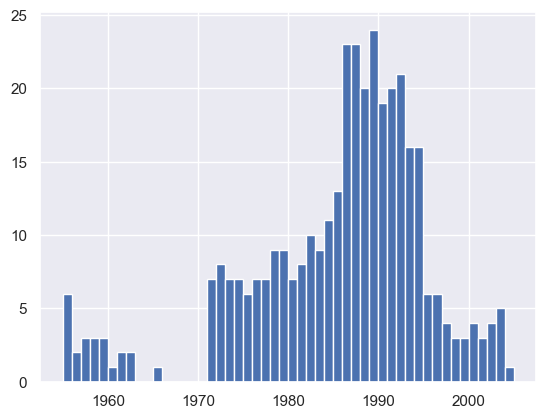

In [11]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins=range(1955, 2006))

Considering the most in a year is fewer than 25, thus they account for less than 4% of any given year's data (disregarding the surge about 1990), we're going to just remove them:

In [12]:
df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)

And check if it worked:

In [13]:
len(df)

25131

In [14]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

Nice! To be honest, I'm not very familiar with these libraries (or Python in general), but it seems fairly self explanatory, so I won't go too in depth on them.

Now, we're going to plot the average profit by year using matplotlib. First, we'll define some variables:

In [17]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

And now, we can plot it:

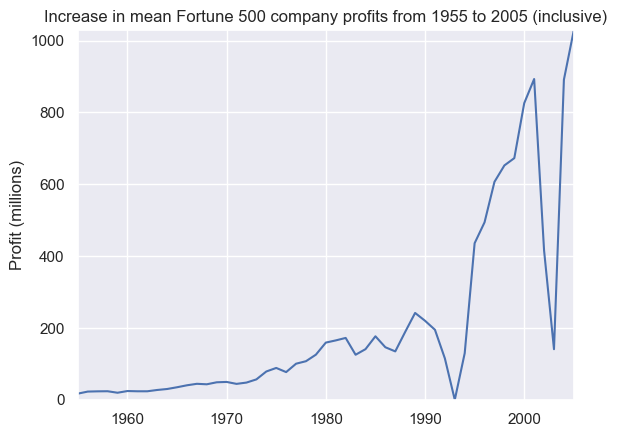

In [18]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005 (inclusive)', 'Profit (millions)')

Considering some of the obvious discrepancies present in the graph, it may seem more useful to check out the revenues for further info:

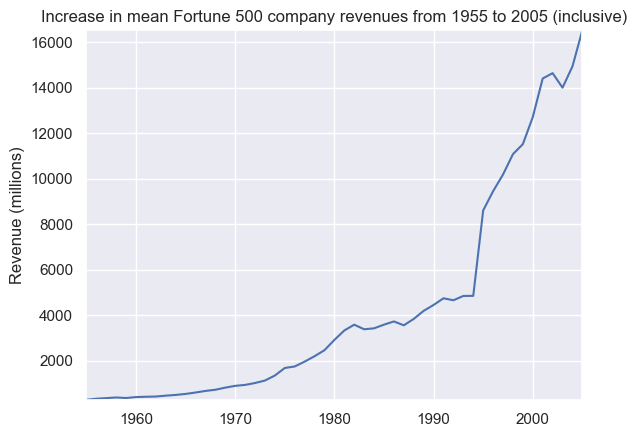

In [19]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005 (inclusive)', 'Revenue (millions)')

Interesting. Now, with some help from [someone on Stack Overflow](https://stackoverflow.com/questions/47581672/replacement-for-deprecated-tsplot/47582329#47582329), these plots can be superimposed with +/- their standard deviations:

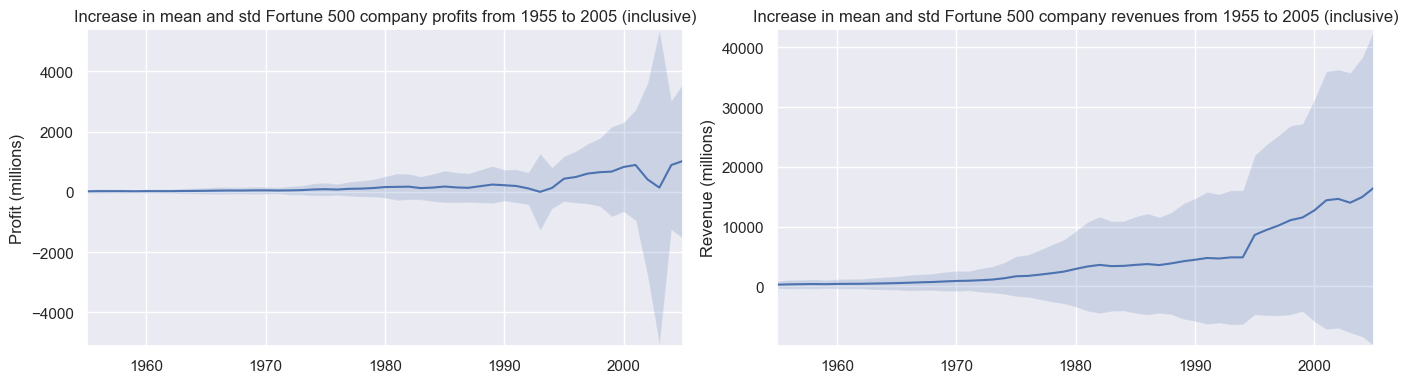

In [20]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005 (inclusive)'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

That's really interesting! The standard deviation greatly increased alongside revenue and profit over the years; it's quite interesting how such things change over time. 

Anyways, this is the end of this tutorial, I believe (aside from sharing notebooks and all that). If anyone else of whom may be reading this (if anyone besides myself ever will, that is, haha!), [here's the tutorial I've been following.](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) It was written in 2020, so it may be slightly outdated, but as of right now (4-11-23), it seems to hold up quite well. I'd recommend checking it out if you're interested in learning a bit about how, why, and what Jupyter Labs/Notebooks can be used for; I thought it was really interesting!